# 🚗 Comprehensive Car Data Analysis

## 🎯 Project Objective

To analyze a diverse set of car attributes to uncover insights that can benefit both the automobile industry and potential car buyers, focusing on performance, efficiency, and value.

## Importing Libraries
We start by importing the necessary libraries for data analysis and visualization: Matplotlib, Pandas, Seaborn, and NumPy.

In [1]:
import pandas as pd

In [3]:
import seaborn as sns

In [5]:
import numpy as np


In [7]:
import matplotlib.pyplot as plt

## Loading the Dataset
We load the car dataset from a CSV file using Pandas and display the first few rows to understand its structure.

In [9]:
df = pd.read_csv(r'C:\Users\LENOVO\Desktop\Python Data Analysis\Cars Dataset.csv')

In [11]:
df.head()

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265.0,17.0,23.0,4451.0,106.0,189.0
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200.0,24.0,31.0,2778.0,101.0,172.0
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200.0,22.0,29.0,3230.0,105.0,183.0
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270.0,20.0,28.0,3575.0,108.0,186.0
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225.0,18.0,24.0,3880.0,115.0,197.0


## Checking Data Types
Next, we print the data types of each column.

In [155]:
print(df.dtypes)

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP            object
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
dtype: object


## Checking the Missing Values
Next, we print any missing values in the dataset.

In [157]:
print(df.isnull().sum())

Make           4
Model          4
Type           4
Origin         4
DriveTrain     4
MSRP           4
Invoice        4
EngineSize     4
Cylinders      6
Horsepower     4
MPG_City       4
MPG_Highway    4
Weight         4
Wheelbase      4
Length         4
dtype: int64


## Converting Currency Columns to Numeric
We convert the MSRP and Invoice columns from string format (with dollar signs and commas) to numeric values, coercing any errors into NaN.

In [13]:
df['MSRP'] = pd.to_numeric(df['MSRP'].str.replace(',', '').str.replace('$', ''), errors='coerce')

In [15]:
df['Invoice'] = pd.to_numeric(df['Invoice'].str.replace(',', '').str.replace('$', ''), errors='coerce')

## Verifying Data Types After Conversion
We print the data types again to confirm the changes made to the MSRP and Invoice columns.

In [40]:
print(df.dtypes)

Make            object
Model           object
Type            object
Origin          object
DriveTrain      object
MSRP           float64
Invoice         object
EngineSize     float64
Cylinders      float64
Horsepower     float64
MPG_City       float64
MPG_Highway    float64
Weight         float64
Wheelbase      float64
Length         float64
dtype: object


## Filling Missing Values
We define a list of columns to fill missing values with their respective mean values to ensure our dataset is complete for analysis.

In [17]:
columns_to_fill = ['EngineSize', 'Cylinders', 'Horsepower', 'MPG_City', 'MPG_Highway', 'Weight', 'Wheelbase', 'Length']

In [19]:
for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

### Dropping Remaining Missing Values
After filling in the missing values, we drop any remaining rows with NaN values to ensure a clean dataset.

In [21]:
df.dropna(inplace=True)

### Counting Unique  Car Values by type.

In [23]:
print(df['Type'].value_counts())

Type
Sedan     262
SUV        60
Sports     49
Wagon      30
Truck      24
Hybrid      3
Name: count, dtype: int64


### Counting Unique Values by Origin

In [52]:
print(df['Origin'].value_counts())

Origin
Asia      156
USA       147
Europe    123
Name: count, dtype: int64


### Calculating Mean MSRP by Origin
We group the data by Origin and calculate the mean MSRP for each group, allowing us to see price differences by origin.

In [25]:
mean_msrp_by_origin = df.groupby('Origin')['MSRP'].mean()
print(mean_msrp_by_origin)

Origin
Asia      24741.322785
Europe    48349.796748
USA       28377.442177
Name: MSRP, dtype: float64


### Aggregating Statistics by Origin
We create a summary of statistics for MSRP (mean, min, max) and average Weight grouped by Origin.

In [29]:
agg_stats = df.groupby('Origin').agg({'MSRP': ['mean', 'min', 'max'], 'Weight': 'mean'})
print(agg_stats)

                MSRP                          Weight
                mean      min       max         mean
Origin                                              
Asia    24741.322785  10280.0   89765.0  3319.316456
Europe  48349.796748  16999.0  192465.0  3680.723577
USA     28377.442177  10995.0   81795.0  3769.952381


## 1. 🏭 Brand and Model Distribution

In [34]:
brand_counts = df['Make'].value_counts()
print("Top 5 car brands:")
print(brand_counts.head())


Top 5 car brands:
Make
Toyota           28
Chevrolet        27
Mercedes-Benz    26
Ford             23
BMW              20
Name: count, dtype: int64


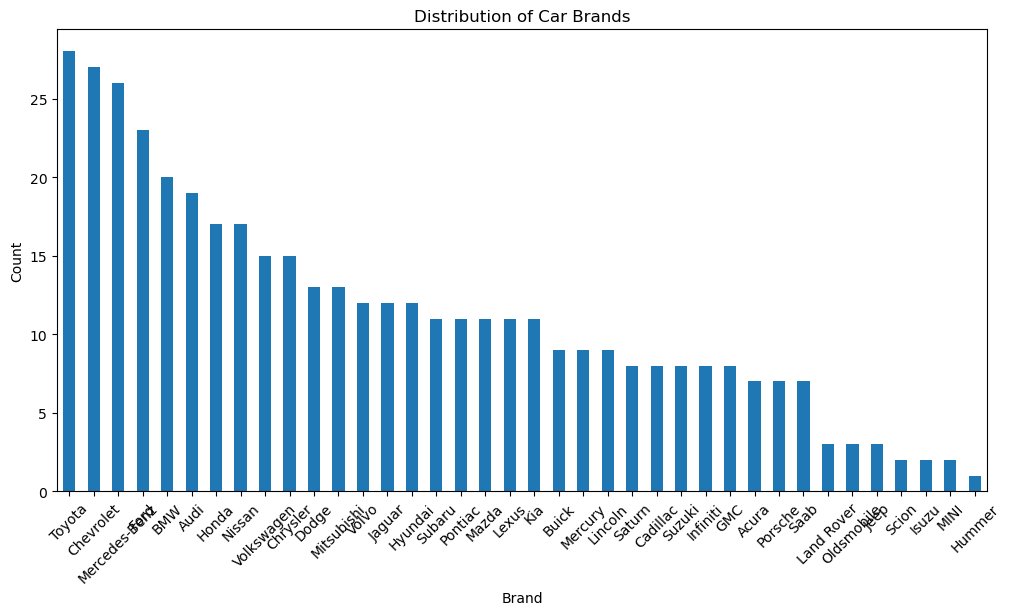

In [36]:
plt.figure(figsize=(12, 6))
brand_counts.plot(kind='bar')
plt.title('Distribution of Car Brands')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### 2. 🌍 Origin Analysis

In [39]:
origin_counts = df['Origin'].value_counts()
print("Car origins distribution:")
print(origin_counts)

Car origins distribution:
Origin
Asia      158
USA       147
Europe    123
Name: count, dtype: int64


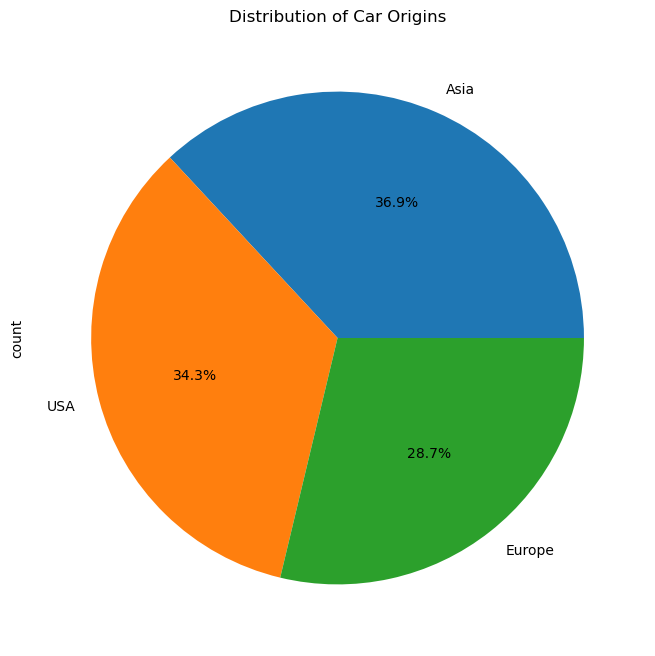

In [41]:
plt.figure(figsize=(8, 8))
origin_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Car Origins')
plt.show()

### 3. 💰 Price vs. Performance

In [44]:
correlation = df['Horsepower'].corr(df['MSRP'])
print(f"Correlation between Horsepower and MSRP: {correlation:.2f}")

Correlation between Horsepower and MSRP: 0.83


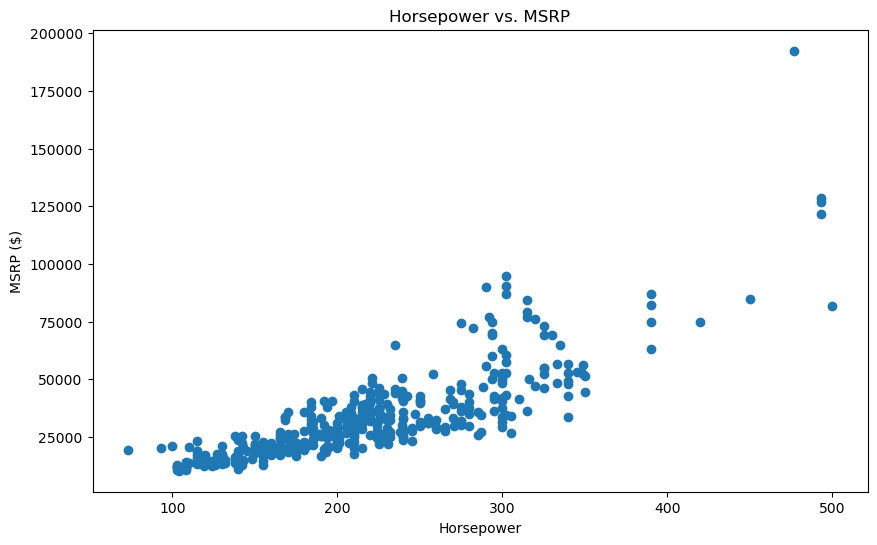

In [46]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Horsepower'], df['MSRP'])
plt.title('Horsepower vs. MSRP')
plt.xlabel('Horsepower')
plt.ylabel('MSRP ($)')
plt.show()

### 4. ⛽ Fuel Efficiency Analysis

In [49]:
mpg_corr = df['MPG_City'].corr(df['MPG_Highway'])
print(f"Correlation between City MPG and Highway MPG: {mpg_corr:.2f}")

Correlation between City MPG and Highway MPG: 0.94


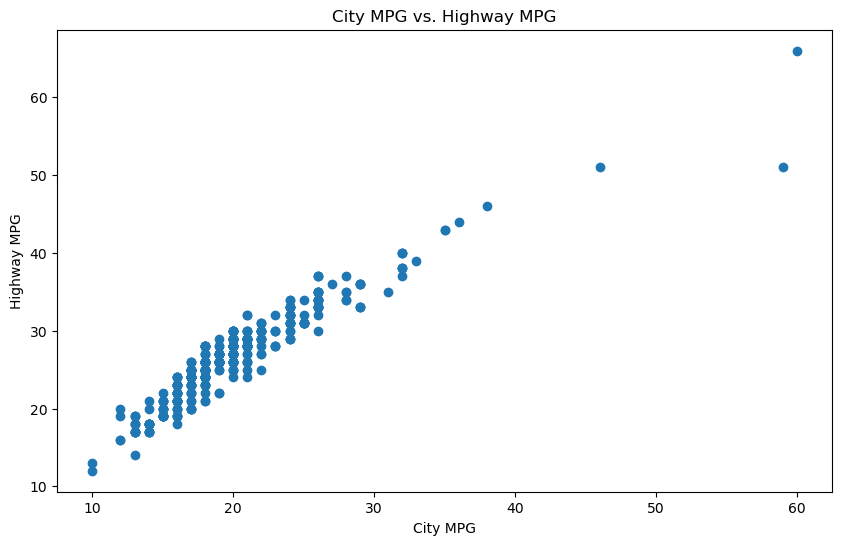

In [51]:
plt.figure(figsize=(10, 6))
plt.scatter(df['MPG_City'], df['MPG_Highway'])
plt.title('City MPG vs. Highway MPG')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.show()

### 5. 🏋️ Weight vs. Fuel Efficiency

In [54]:
weight_mpg_corr = df['Weight'].corr(df['MPG_City'])
print(f"Correlation between Weight and City MPG: {weight_mpg_corr:.2f}")

Correlation between Weight and City MPG: -0.74


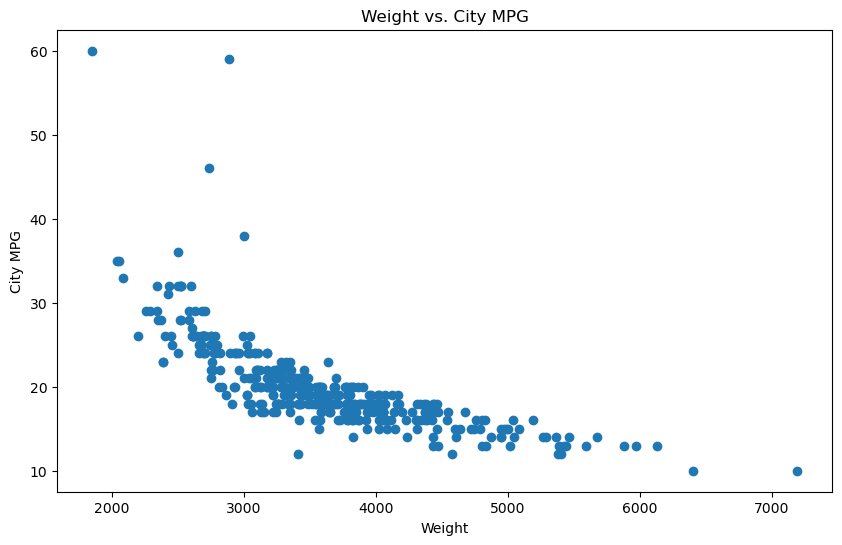

In [56]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Weight'], df['MPG_City'])
plt.title('Weight vs. City MPG')
plt.xlabel('Weight')
plt.ylabel('City MPG')
plt.show()

### 6. 🔧 Engine Size and Cylinder Correlation

In [59]:
engine_cylinder_corr = df['EngineSize'].corr(df['Cylinders'])
print(f"Correlation between Engine Size and Cylinders: {engine_cylinder_corr:.2f}")

Correlation between Engine Size and Cylinders: 0.90


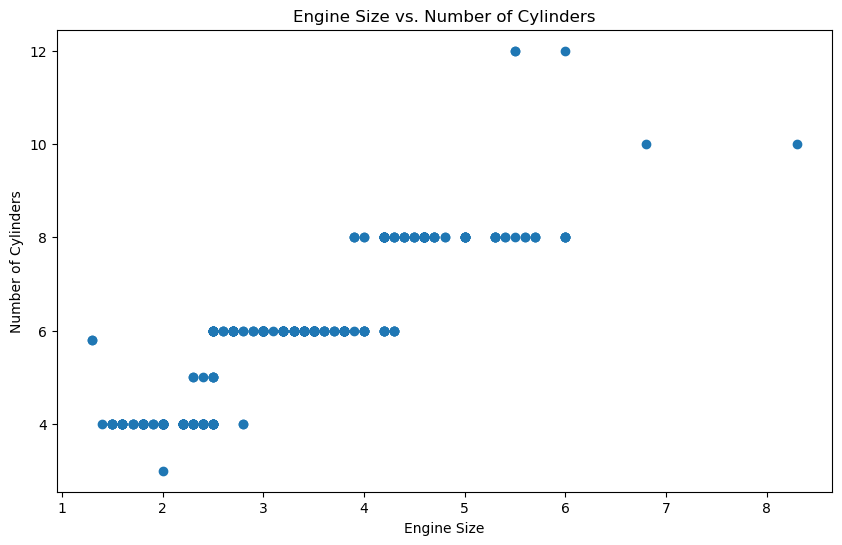

In [61]:
plt.figure(figsize=(10, 6))
plt.scatter(df['EngineSize'], df['Cylinders'])
plt.title('Engine Size vs. Number of Cylinders')
plt.xlabel('Engine Size')
plt.ylabel('Number of Cylinders')
plt.show()

### 7. 🏎️ Performance Index

In [64]:
df['Performance_Index'] = (df['Horsepower'] / df['Weight']) * 100
print("Performance Index Statistics:")
print(df['Performance_Index'].describe())

Performance Index Statistics:
count    428.000000
mean       6.009211
std        1.550146
min        3.330003
25%        4.985623
50%        5.705817
75%        6.548347
max       15.234749
Name: Performance_Index, dtype: float64


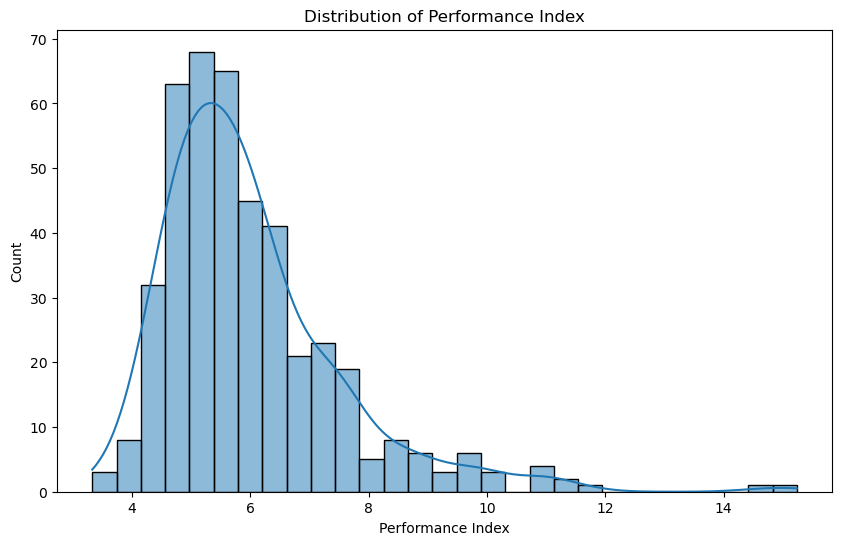

In [66]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Performance_Index'], kde=True)
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.show()

### 8. 💵 Value for Money

In [69]:
df['Value_Index'] = df['Horsepower'] / df['MSRP']
print("Top 10 cars by Value Index:")
print(df.nlargest(10, 'Value_Index')[['Make', 'Model', 'Horsepower', 'MSRP', 'Value_Index']])

Top 10 cars by Value Index:
       Make                     Model  Horsepower     MSRP  Value_Index
349  Saturn                  Ion1 4dr       140.0  10995.0     0.012733
371  Suzuki                Aeno S 4dr       155.0  12884.0     0.012030
117   Dodge        Dakota Regular Cab       210.0  17630.0     0.011912
402  Toyota     Tundra Regular Cab V6       190.0  16495.0     0.011519
318  Nissan         Titan King Cab XE       305.0  26650.0     0.011445
401  Toyota                    Tacoma       142.0  12800.0     0.011094
148     GMC  Sierra Extended Cab 1500       285.0  25717.0     0.011082
372  Suzuki              Aerio LX 4dr       155.0  14500.0     0.010690
315  Nissan            350Z coupe 2dr       287.0  26910.0     0.010665
119   Dodge   Ram 1500 Regular Cab ST       215.0  20215.0     0.010636


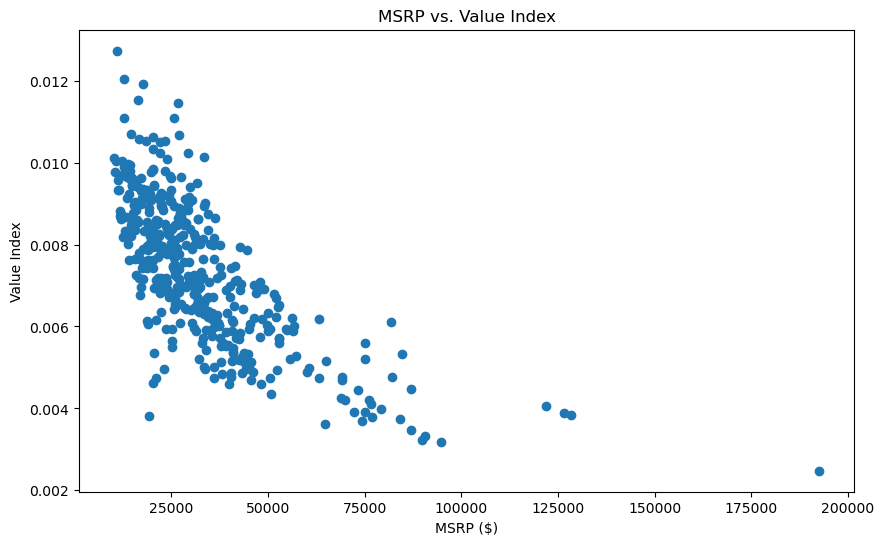

In [71]:
plt.figure(figsize=(10, 6))
plt.scatter(df['MSRP'], df['Value_Index'])
plt.title('MSRP vs. Value Index')
plt.xlabel('MSRP ($)')
plt.ylabel('Value Index')
plt.show()

### 9. 🌿 Eco-Friendly Score

In [74]:
df['Eco_Score'] = (df['MPG_City'] + df['MPG_Highway']) / 2
print("Top 10 most eco-friendly cars:")
print(df.nlargest(10, 'Eco_Score')[['Make', 'Model', 'MPG_City', 'MPG_Highway', 'Eco_Score']])

Top 10 most eco-friendly cars:
           Make                                   Model  MPG_City  \
152       Honda              Insight 2dr (gas/electric)      60.0   
377      Toyota                Prius 4dr (gas/electric)      59.0   
151       Honda  Civic Hybrid 4dr manual (gas/electric)      46.0   
408  Volkswagen                       Jetta GLS TDI 4dr      38.0   
157       Honda                            Civic HX 2dr      36.0   
386      Toyota                         Echo 2dr manual      35.0   
388      Toyota                                Echo 4dr      35.0   
383      Toyota                          Corolla CE 4dr      32.0   
384      Toyota                           Corolla S 4dr      32.0   
385      Toyota                          Corolla LE 4dr      32.0   

     MPG_Highway  Eco_Score  
152         66.0       63.0  
377         51.0       55.0  
151         51.0       48.5  
408         46.0       42.0  
157         44.0       40.0  
386         43.0       39.0  

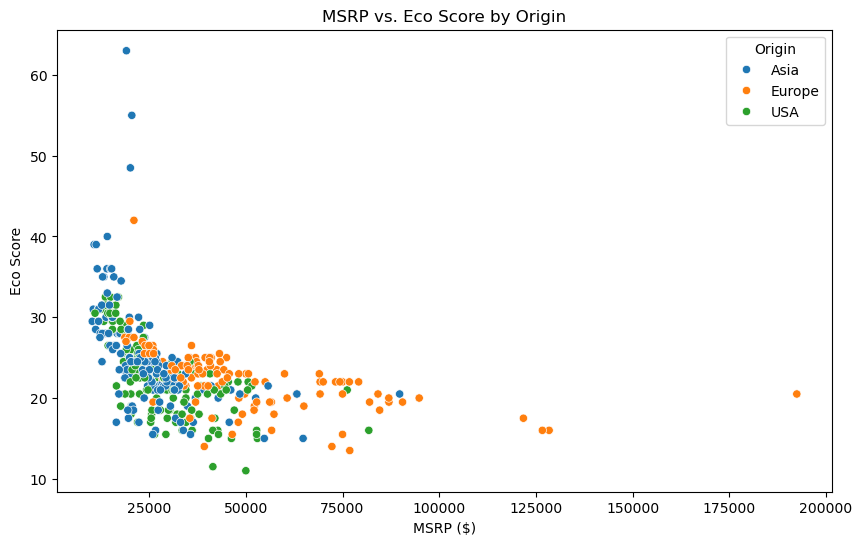

In [76]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='MSRP', y='Eco_Score', hue='Origin')
plt.title('MSRP vs. Eco Score by Origin')
plt.xlabel('MSRP ($)')
plt.ylabel('Eco Score')
plt.show()

### 🏁 Conclusion
This analysis provides a comprehensive overview of the car market, highlighting the relationships between various factors such as price, performance, and efficiency. 

<p align="center">
  <b>Analysis by George Zacharia</b><br>
   Car Data Analyst
</p>
<p align="center">
  <i>Driving insights through data analysis</i>
</p>
```